In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load the data
nba_dataset = pd.read_csv('players_stats.csv')

In [4]:
nba_dataset.columns

Index(['Name', 'Games Played', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'EFF', 'AST/TOV', 'STL/TOV', 'Age', 'Birth_Place',
       'Birthdate', 'Collage', 'Experience', 'Height', 'Pos', 'Team', 'Weight',
       'BMI'],
      dtype='object')

In [5]:
nba_dataset.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [6]:
nba_dataset.mean()

Games Played      53.014286
MIN             1214.714286
PTS              502.108163
FGM              188.338776
FGA              419.526531
FG%               43.099184
3PM               39.387755
3PA              112.524490
3P%               25.519184
FTM               86.042857
FTA              114.689796
FT%               70.450408
OREB              54.655102
DREB             162.697959
REB              217.353061
AST              110.616327
STL               38.838776
BLK               24.075510
TOV               68.826531
PF               101.483673
EFF              564.330612
AST/TOV            1.465837
STL/TOV            0.626000
Age               27.507109
Height           197.440758
Weight            99.469194
BMI               25.427747
dtype: float64

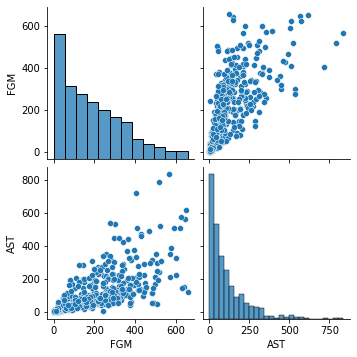

In [7]:
sns.pairplot(nba_dataset[['FGM','AST']])

In [8]:
# Make Heat map to see correlations
nba_dataset[['FGM','AST']].corr()

,FGM,AST
FGM,1.000000,0.704545
AST,0.704545,1.000000


In [9]:
# Make the cluster of players using kMeans
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5, random_state=1)
good_columns = nba_dataset._get_numeric_data().dropna(axis=1) # get numeric data and remove missing data from the columns
kmeans_model.fit(good_columns) # Train the model
labels = kmeans_model.labels_ # Get the lables
labels

array([1, 0, 4, 4, 2, 0, 3, 4, 1, 3, 4, 4, 3, 4, 4, 3, 0, 4, 1, 2, 0, 3,
       4, 4, 1, 3, 1, 2, 4, 2, 3, 3, 4, 1, 3, 0, 1, 3, 0, 4, 0, 3, 1, 3,
       2, 3, 0, 0, 3, 0, 1, 3, 0, 1, 1, 3, 2, 1, 1, 3, 1, 3, 0, 3, 3, 1,
       0, 3, 4, 3, 4, 3, 4, 1, 1, 3, 2, 1, 4, 0, 1, 4, 1, 3, 4, 0, 4, 3,
       0, 0, 1, 2, 4, 3, 4, 0, 3, 3, 1, 1, 4, 3, 4, 1, 1, 0, 2, 1, 0, 2,
       0, 3, 0, 2, 3, 3, 3, 1, 4, 0, 2, 4, 0, 4, 1, 2, 4, 1, 1, 3, 1, 0,
       1, 1, 0, 1, 0, 4, 1, 1, 2, 2, 0, 1, 3, 1, 3, 0, 4, 1, 4, 1, 4, 4,
       3, 3, 3, 0, 1, 2, 1, 4, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 3, 4, 3,
       4, 3, 1, 4, 3, 4, 0, 4, 3, 4, 4, 1, 3, 4, 1, 0, 3, 4, 2, 3, 4, 1,
       1, 1, 1, 1, 3, 3, 1, 0, 4, 1, 3, 3, 0, 1, 1, 1, 0, 0, 1, 1, 3, 1,
       1, 4, 0, 1, 1, 3, 1, 2, 3, 0, 0, 3, 1, 3, 2, 1, 4, 4, 1, 3, 1, 1,
       1, 2, 1, 4, 3, 0, 1, 3, 1, 1, 0, 1, 3, 1, 0, 0, 3, 1, 4, 4, 3, 1,
       0, 3, 0, 1, 4, 0, 3, 0, 1, 3, 4, 2, 3, 3, 0, 3, 3, 2, 3, 3, 4, 3,
       1, 0, 2, 4, 3, 2, 2, 3, 3, 1, 3, 1, 4, 4, 4,

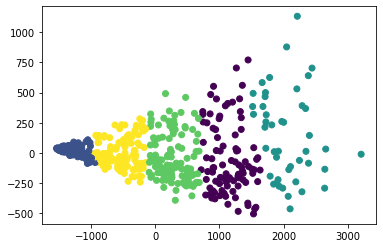

In [10]:
# Plot players by cluster
from sklearn.decomposition import PCA

pca = PCA(2)
plot_columns = pca.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [25]:
Lebron = good_columns.loc[nba_dataset['Name'] == 'LeBron James',: ]
Lebron

Durant = good_columns.loc[nba_dataset['Name'] == 'Kevin Durant',: ]
Durant

Stephen = good_columns.loc[nba_dataset['Name'] == 'Stephen Curry',:]
Stephen

Klay = good_columns.loc[nba_dataset['Name'] == 'Klay Thompson']
Klay

James = good_columns.loc[nba_dataset['Name'] == 'James Harden']
James

Kobe = good_columns.loc[nba_dataset['Name'] == 'Kobe Bryant']
Kobe

Draymond = good_columns.loc[nba_dataset['Name'] == 'Draymond Green']
Draymond

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,DREB,REB,AST,STL,BLK,TOV,PF,EFF,AST/TOV,STL/TOV
125,79,2490,921,339,765,44.3,111,329,33.7,132,...,533,647,291,123,99,133,253,1454,2.19,0.93


In [26]:
LeBron_list = Lebron.values.tolist()
Durant_list = Durant.values.tolist()
Stephen_list = Stephen.values.tolist()
Klay_list = Klay.values.tolist()
James_list = James.values.tolist()
Kobe_list = Kobe.values.tolist()
Draymond_list = Draymond.values.tolist()

print(kmeans_model.predict(LeBron_list))
print(kmeans_model.predict(Durant_list))
print(kmeans_model.predict(Stephen_list))
print(kmeans_model.predict(Klay_list))
print(kmeans_model.predict(James_list))
print(kmeans_model.predict(Kobe_list))
print(kmeans_model.predict(Draymond_list))


[2]
[3]
[2]
[2]
[2]
[3]
[2]
